In [1]:
import random as rand #for random numbers
import numpy as np
import matplotlib.pyplot as plt

# The Senario

You are creating a fundraiser for your favorite HPU student organization. In this fundraiser, people can buy "throws" of darts for a fixed price. They then win money based on where their dart hits a board with concentric circles. How much money can you expect to earn? What is the least you can charge for a throw and still make money? Your task is going to modeling the game to answer these questions!



# Details of the Game

You have constructed a dart board that is a square of length 45 cm.

Inside the square, there are three circles. The purple circle has a diameter 45 cm (radius 22.5 cm). The blue circle has a diameter 27 cm (radius 13.5 cm). The red circle has a diameter 9 cm (radius 4.5 cm).

![](https://github.com/atitus/math-modeling/raw/master/unit-04/04-02-game/dartboard.png)

## The Rules of the Game

A dart inside the red circle wins $\$10$.
A dart inside the blue circle (but not in the red circle) wins $\$5$.
A dart inside the purple circle (but not in the red nor blue circles) wins $\$1$.

For the fundraiser, you will sell "throws" for a certain price $P$. How much money will you make for 100 throws at $5 per throw? To answer this question with a Monte Carlo simulation, you should answer these questions:

1. What assumptions will you make for your model?
2. What will you randomize?
3. How will you know what circle a dart lands within?


1. Assume the darts are equally likely to hit anywhere on the board (i.e. there is no prefered location) and all darts land on the board.
1. We will randomize the dart location. We will define a coordinate system with the origin $(0,0)$ at the center of the board, with the $+x$ axis to the right and the $+y$ axis point up. To randomize the dart location we will select a random value for x and y within the bounds of the board.
1. The distance from the center to the dart, $d$, is given by $d = \sqrt{x^2+y^2}$. We will compare this with the radius of each circle to determine in what region the dart landed.


## Program Template

The program below is a starting program for the model. However, there are two parts of the code you must edit or add.

1. The variables `x` and `y` should be random coordinates of a dart, at the location it hits the board. Make these two variables an appropriate randnum float.
2. A conditional is needed to determine whether the dart lands inside the red, blue, or purple circles and to increment (i.e. count) the variables `Npurple`, `Nblue`, or `Nred` if the dart lands inside its respective circle.

Add these parts of the code and run it to see if you have random darts over the entire board.

Percent in red = 5.00%
Percent in blue = 23.00%
Percent in purple = 49.00%
Percent not in a circle = 23.00%
Gross = $500.00
Loss = $214.00
Profit = $286.00 = 57.20% of gross


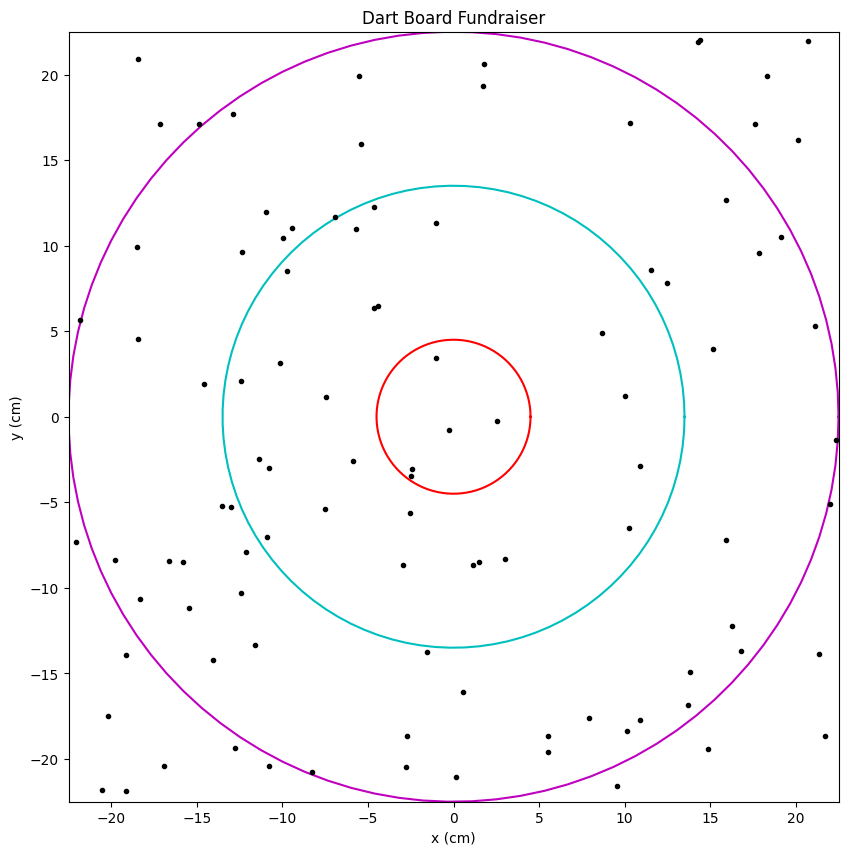

In [4]:
P = 5 #price per dart
Ntosses = 100 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    x = rand.uniform(-L/2, L/2) #should be a random number
    y = rand.uniform(-L/2, L/2) #should be a random number
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 1: Expected earnings

For 100 throws, we might win or lose money on our fundraiser, simply due to randomness of the darts. If we want to investigate what we can *expect* to make from our fundraiser for a price of 5 dollars per throw, how should you change the model?

When only throwing 100 darts, the random fluctuations mean we cannot calculate our expected earnings. **By increasing the number of darts thrown** we can examine the large $N$ behavior which will give us the expected earnings.

Make the change to your program that you just suggested and then answer the following question. How much can we *expect* to make on our fundraiser?

We can expect to earn approximatly 58.4 % of our gross, which for our fundraiser selling 100 darts is $292.

Percent in red = 3.12%
Percent in blue = 25.33%
Percent in purple = 50.19%
Percent not in a circle = 21.36%
Gross = $500000.00
Loss = $208012.00
Profit = $291988.00 = 58.40% of gross


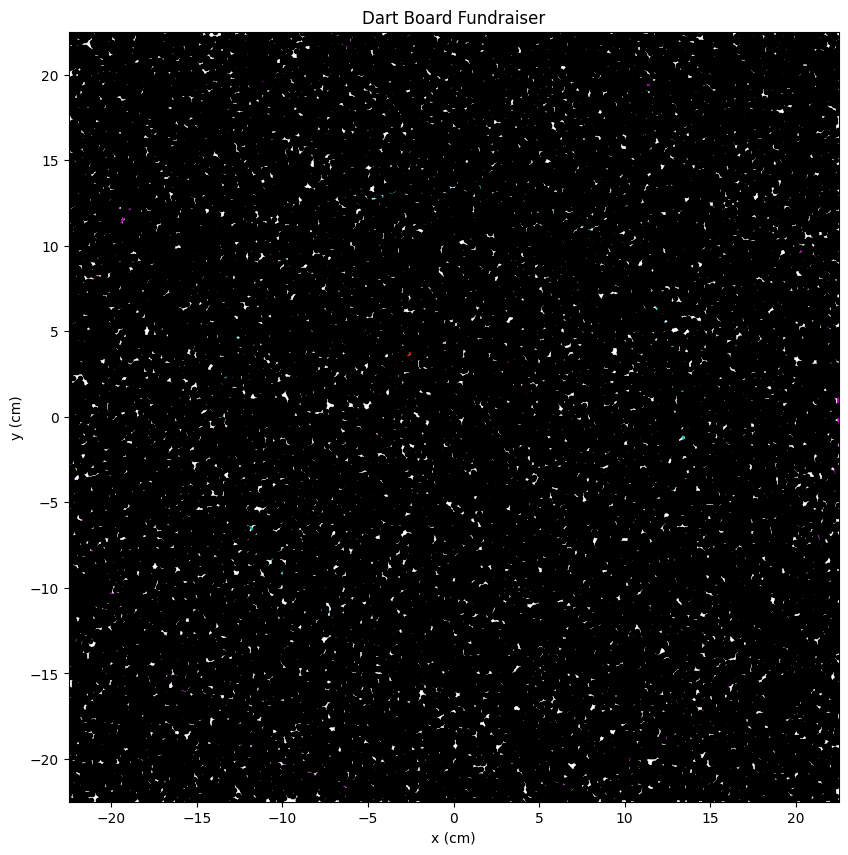

In [5]:
P = 5 #price per dart
Ntosses = 100000 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    x = rand.uniform(-L/2, L/2) #should be a random number
    y = rand.uniform(-L/2, L/2) #should be a random number
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 2: Break even price

Your goal is to get many people to buy "throws" to support the fundraiser. The cheaper the price per throw, the more people you can get to sign up. What is the minimum price you can charge so you don't lose money on the fundraiser? (Presumably, you'll want to charge much more than this value. The minimum price per throw represents the line you can't cross when it comes to losing or making money.)

The price per dart that gives nearly zero profit is between \$2.07 and \$2.08.

Percent in red = 3.19%
Percent in blue = 25.36%
Percent in purple = 50.05%
Percent not in a circle = 21.39%
Gross = $207000.00
Loss = $208773.00
Profit = $-1773.00 = -0.86% of gross


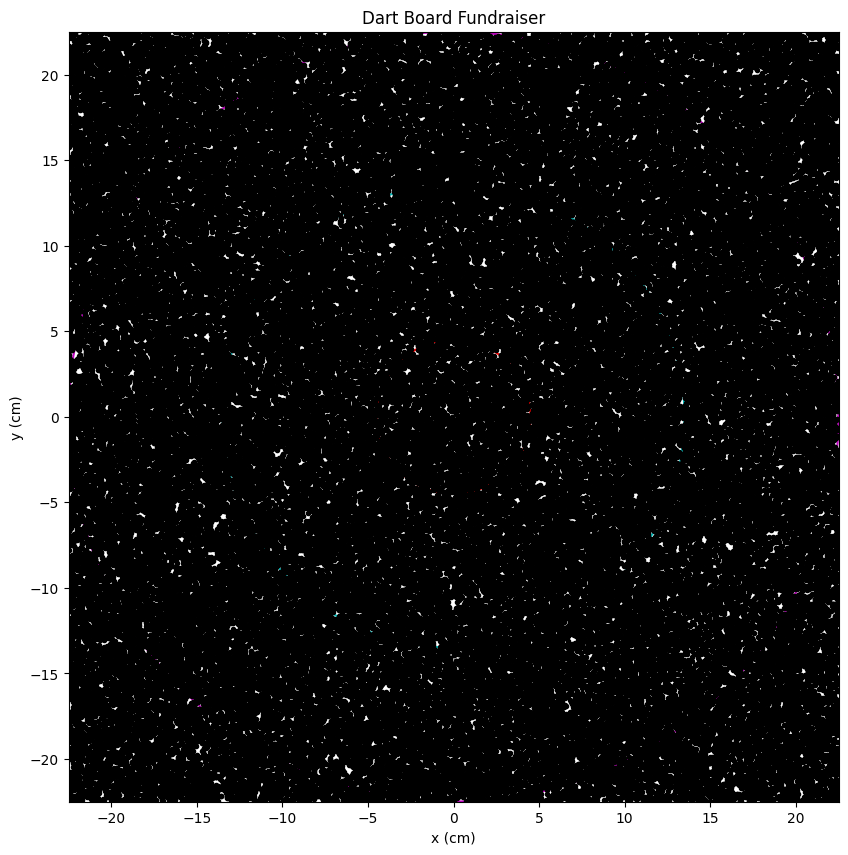

In [18]:
P = 2.08 #price per dart
Ntosses = 100000 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    x = rand.uniform(-L/2, L/2) #should be a random number
    y = rand.uniform(-L/2, L/2) #should be a random number
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 3: Extending your Game

1. What analytical questions can you ask about this fundraiser and how would you go about answering them?

2. How can you change your game? Investigate at least one change and report on the outcome.

Here are some example questions:

- If we make the blue and red circles 50% smaller how much more money will we make?
- If assume 10% of darts miss the board entirely how much more profit will we make?
- If we change the payout for the red, blue, and purple to 4, 2, and 1 dollars, respectivley, and only charge 2 dollars per throw will we make more or less profit?

The code below answers the last question: In this case, our expected profit is approximatley 43.2% of gross which is lower than our original expected profit of 58.4% of gross.

Percent in red = 3.19%
Percent in blue = 25.20%
Percent in purple = 50.41%
Percent not in a circle = 21.20%
Gross = $200000.00
Loss = $113579.00
Profit = $86421.00 = 43.21% of gross


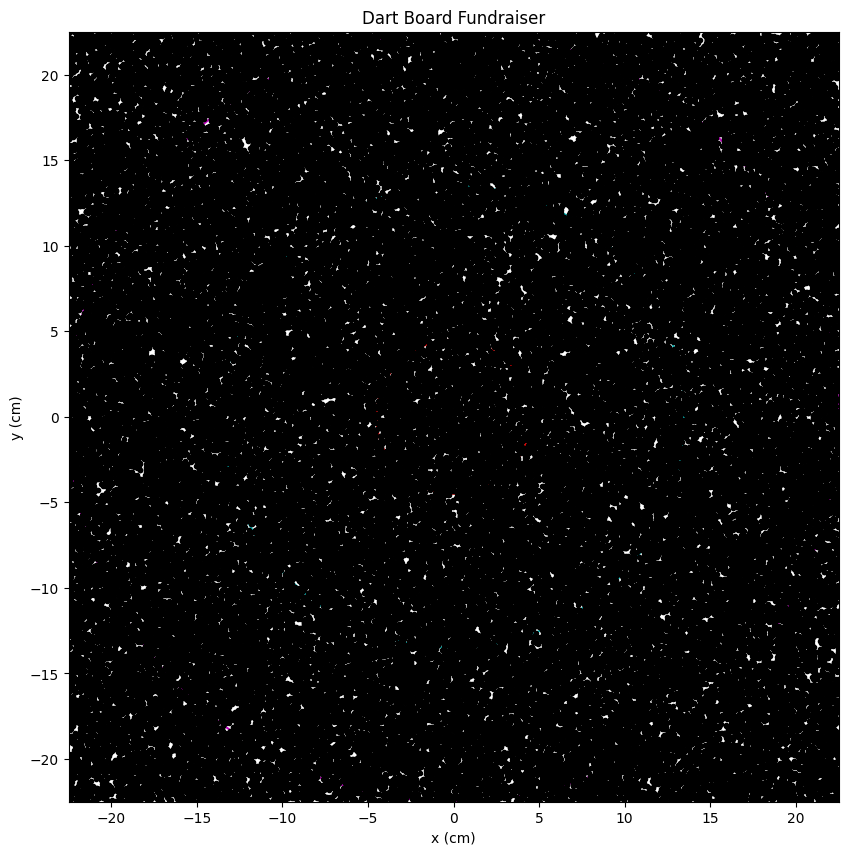

In [19]:
P = 2 #price per dart
Ntosses = 100000 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 2
Pred = 4

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    x = rand.uniform(-L/2, L/2) #should be a random number
    y = rand.uniform(-L/2, L/2) #should be a random number
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Gaussian Distribution

In the previous model of the dart board fundraiser, we assumed that every location on the board had an equal probability of a dart landing at that location. Thus, we are assuming a person is blindfolded or is not trying to hit the bullseye. It's as if the dartboard is blank and they think the bullseye could be anywhere on the blank page. In reality, maybe more darts land near the blue circle than the red or purple circle. How can we modify our model to take this into account?

A normal distribution is one where the number of occurrences of a particular event in each bin follows a function

$$\frac{1}{\sqrt{2\pi \sigma}}e^{-(x-\mu)^2/(2\sigma)}$$

where $\mu$ is called the *mean* and $\sigma$ is the standard deviation.

The `random` package can return a random number that is generated from a normal distribution. Use the function

```
random.gauss(mu, sigma)
```

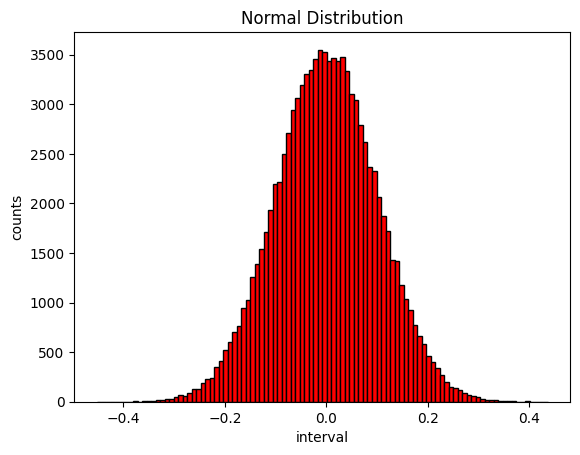

In [ ]:
N=100000 #number of random numbers

mu=0 #mean
sigma=0.1 #standard deviation

r_numbers=[] #list to store random numbers

i=0
while i<N:
    r=rand.gauss(mu,sigma)
    r_numbers.append(r)
    i = i +1

totalbins = 100 # number of bins used for counting random numbers in that bin

histogram = plt.hist(r_numbers, bins=totalbins, facecolor='red', edgecolor='black', linewidth=1)
plt.title("Normal Distribution")
plt.xlabel("interval")
plt.ylabel("counts")
plt.show()

# Exercise 4: Using a Gaussian Distribution for the Fundraiser Dart Board

Where do you think most darts land on a dart board if people are aiming for the bullseye and if people are inexperienced at throwing darts?

How can we change our model to reflect that the mean x position at which darts land on the board is not zero (which is the bullseye)?

If most people are aiming at the bullseye and inexperienced at throwing darts, we will assume that they are more likely to hit somewhere around the blue circle than anywhere else.

We can adjust our model by assuming the distance of the dart from the origin follows a Gaussian distribution centered at the blue circle.

Percent in red = 4.00%
Percent in blue = 40.00%
Percent in purple = 54.00%
Percent not in a circle = 2.00%
Gross = $500.00
Loss = $294.00
Profit = $206.00 = 41.20% of gross


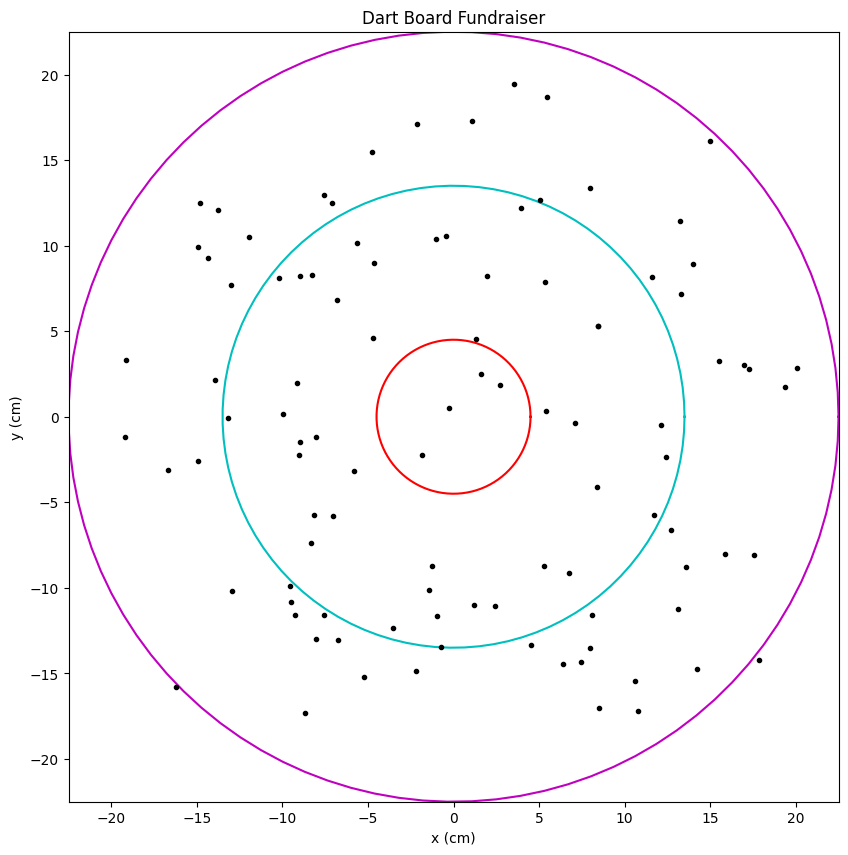

In [25]:
P = 5 #price per dart
Ntosses = 100 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    r = rand.gauss(Rblue, 4.5)
    angle = rand.uniform(0,2*np.pi)
    x = r*np.cos(angle)
    y = r*np.sin(angle)
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 5: Expected Profit and Minimum Price for a Gaussian Dist.

Do Exercises 1 and 2 again, but this time using the Gaussian distribution in Exercise 4. Compare your answers to the first model, with unimformly distributed darts.



## Exercise 1
The expected profit with the modified model is approximatley %37.8 of gross, less than the model with uniformly distributed darts which had an approximate proffit of 58.4% of gross.



Percent in red = 2.33%
Percent in blue = 48.07%
Percent in purple = 47.35%
Percent not in a circle = 2.25%
Gross = $500000.00
Loss = $311022.00
Profit = $188978.00 = 37.80% of gross


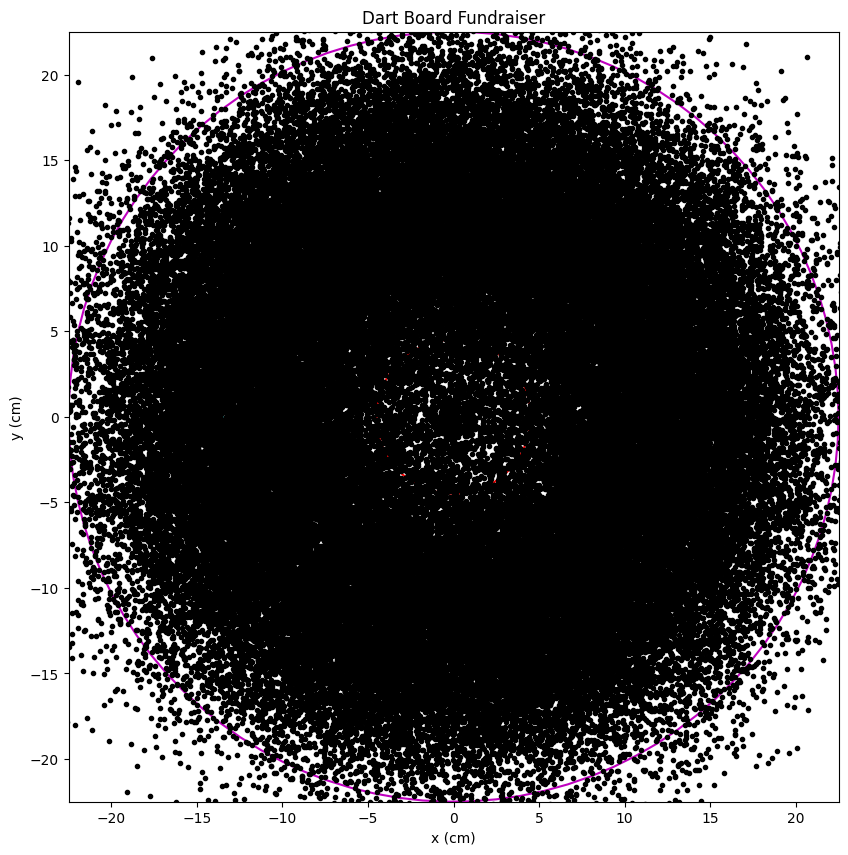

In [28]:
P = 5 #price per dart
Ntosses = 100000 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    r = rand.gauss(Rblue, 4.5)
    angle = rand.uniform(0,2*np.pi)
    x = r*np.cos(angle)
    y = r*np.sin(angle)
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Exercise 2

The break-even point for the modified model is between 3.08 and 3.09 dollars. This is almost a dollar more than the break-even price for the uniformly distributed model.

Percent in red = 2.31%
Percent in blue = 47.66%
Percent in purple = 47.69%
Percent not in a circle = 2.33%
Gross = $308000.00
Loss = $309128.00
Profit = $-1128.00 = -0.37% of gross


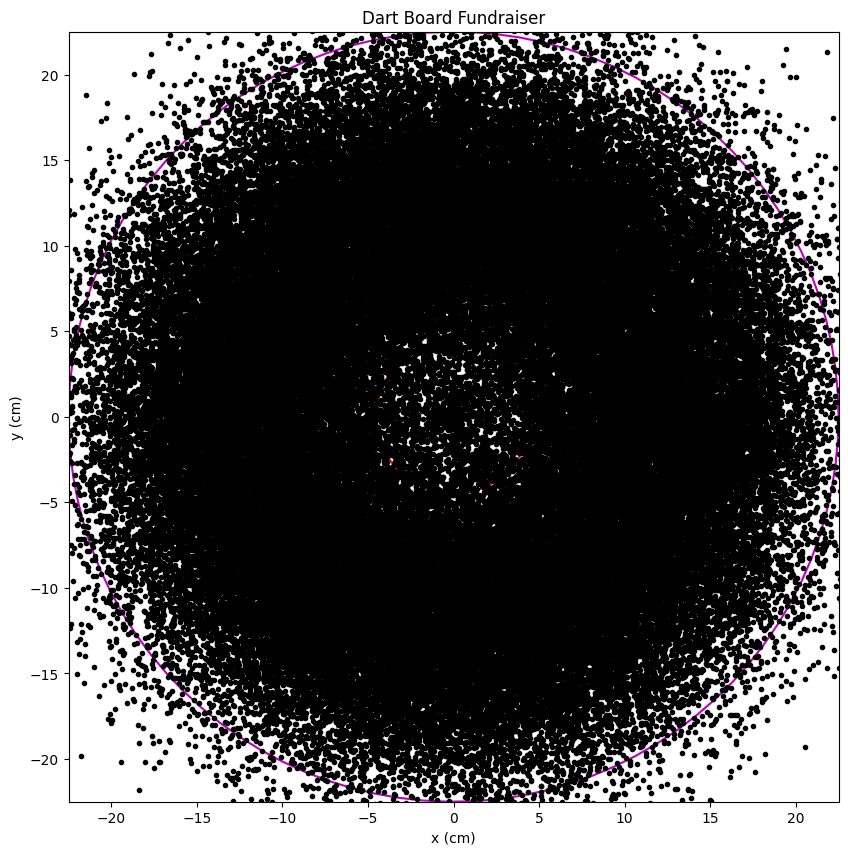

In [45]:
P = 3.08 #price per dart
Ntosses = 100000 #number of darts thrown

L = 45 #the length of one side of the dart board in cm
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):

    r = rand.gauss(Rblue, 4.5)
    angle = rand.uniform(0,2*np.pi)
    x = r*np.cos(angle)
    y = r*np.sin(angle)
    xmodel.append(x)
    ymodel.append(y)

    ######
    # See if the x,y coordinates of a dart is within each circle and count Npurple, Nblue, or Nred
    d = np.sqrt(x**2+y**2)
    if d < Rred:
      Nred += 1
    elif d < Rblue: # could also do: if d > Rred and d < Rblue
      Nblue += 1
    elif d < Rpurple: # could also do: if d > Rblue and d < Rpurple
      Npurple += 1
    ######

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred


print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()